**Importación de librerías necesarias**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn import datasets, metrics

**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Tipos de datos del df

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mostrar un mapa de calor que indique la correlación entre vriables

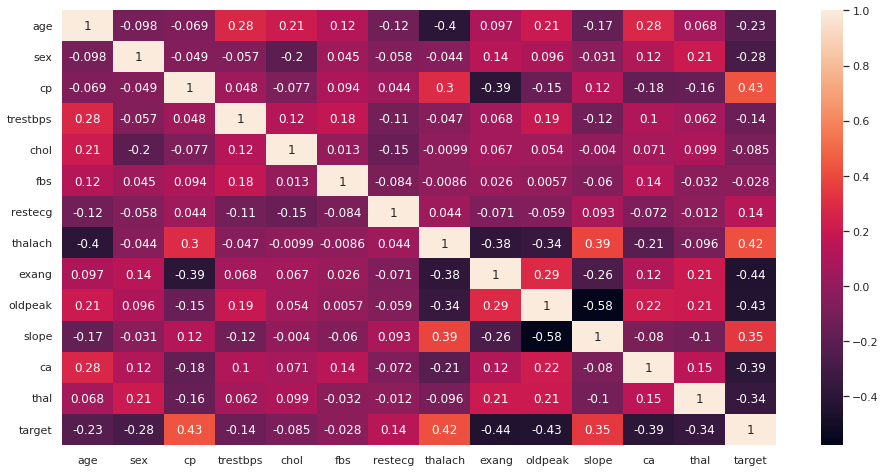

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

In [ ]:
# campos : por ahora sin filtar

# df_filtrado  = pd.DataFrame()
# df_filtrado = df[[]].copy()

# df_filtrado


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_heart = df.drop('target',axis = 1)
y_heart = df['target']

Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test),  separacion train y test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_heart,y_heart,
                                                 test_size = 0.25,
                                                 train_size = 0.75)

**Entrenamiento y predicción**


Elegir, instanciar y entrenar el modelo

In [ ]:
model = BernoulliNB()

# entrenamiento
model.fit(x_train,y_train)



BernoulliNB()

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_model = model.predict(x_test)

**Evaluación**

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
# evaluacion
accuracy_score(y_test,y_model)


0.7368421052631579

Mostrar la predicción realizada (imprimir la variable con la predicción)


In [ ]:
y_model

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

Representar gráficamente la clasificación obtenida (matriz de confusión)


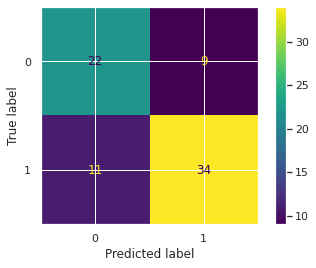

In [ ]:
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

In [ ]:
from pandas.core.dtypes.inference import is_file_like
# con KNeighborsClassifier

# parametros
# k = 3
# w = 'uniform'

valores_w = ['uniform','distance']
porcentajes = []
k_max = 0
w_max = ""

for w in valores_w:
  for k in range(1,31):
    # instanciamos el modelo
    model = KNeighborsClassifier(k,weights=w)

    # entrenamiento
    model.fit(x_train,y_train)

    # Mostrar la predicción realizada (imprimir la variable con la predicción)
    # y_model
    # print(y_model)

    y_model = model.predict(x_test)

    porcentajes.append(accuracy_score(y_test,y_model))

    if max(porcentajes) == accuracy_score(y_test,y_model):
      k_max = k
      w_max = w


    print(f"El porcentaje: {accuracy_score(y_test,y_model)} con k como: {k} y con w como: {w}")
  


El porcentaje: 0.6842105263157895 con k como: 1 y con w como: uniform
El porcentaje: 0.6052631578947368 con k como: 2 y con w como: uniform
El porcentaje: 0.6578947368421053 con k como: 3 y con w como: uniform
El porcentaje: 0.6578947368421053 con k como: 4 y con w como: uniform
El porcentaje: 0.6842105263157895 con k como: 5 y con w como: uniform
El porcentaje: 0.6842105263157895 con k como: 6 y con w como: uniform
El porcentaje: 0.7236842105263158 con k como: 7 y con w como: uniform
El porcentaje: 0.6710526315789473 con k como: 8 y con w como: uniform
El porcentaje: 0.7105263157894737 con k como: 9 y con w como: uniform
El porcentaje: 0.6710526315789473 con k como: 10 y con w como: uniform
El porcentaje: 0.7368421052631579 con k como: 11 y con w como: uniform
El porcentaje: 0.6973684210526315 con k como: 12 y con w como: uniform
El porcentaje: 0.7105263157894737 con k como: 13 y con w como: uniform
El porcentaje: 0.7105263157894737 con k como: 14 y con w como: uniform
El porcentaje: 

In [ ]:
print(f"El valor max de porcentaje es:{max(porcentajes)}, con k={k_max}, y w={w_max}")

El valor max de porcentaje es:0.7368421052631579, con k=11, y w=uniform


Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =
5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o
mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5
ejecuciones.


In [ ]:
kf = KFold(n_splits=5)
 
# parametros
k = k_max
w = w_max

# elegimos clasificador

# instanciamos el modelo
model = KNeighborsClassifier(k,weights=w)

# entrenamiento
model.fit(x_train,y_train)
 
score = model.score(x_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(model, x_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = model.predict(x_test)
 
score_pred = metrics.accuracy_score(y_test, preds)

print("Metrica en Test", score_pred)


Metrica del modelo 0.6828193832599119
Metricas cross_validation [0.63043478 0.67391304 0.6        0.66666667 0.64444444]
Media de cross_validation 0.6430917874396135
Metrica en Test 0.7368421052631579


In [ ]:
# evaluacion
# Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test,y_model)

0.6973684210526315

In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
y_model

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

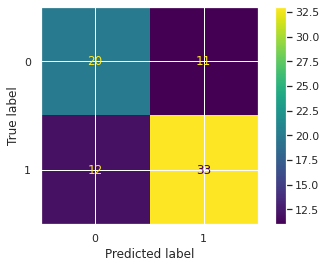

In [ ]:
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()